# Probability Distribution, Statistics - Algorithmic Trading

In [33]:
# Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import mplfinance as mpf
import math
import os

import ta # librería para indicadores técnicos
from scipy.stats import norm # Para la distribución normal
from math import sqrt
# Definir Ticker
ticker = "TSLA"
from io import StringIO

In [2]:
# Download data 
#data = yf.download("TSLA", start = "2020-07-01" , end = "2025-07-29")

<ipython-input-2-c54c6d24daa5>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TSLA", start = "2020-07-01" , end = "2025-07-29")
[*********************100%***********************]  1 of 1 completed


In [3]:
# Save the data to CSV file
#data.to_csv("Data/tsla.csv")

In [4]:
# Import data into a data frame
data = pd.read_csv("data/tsla.csv", index_col=[0], header=0, skiprows=2, parse_dates=[0])
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
Date,,,,,
2020-07-01,74.641998,75.688667,72.033333,72.199997,199903500
2020-07-02,80.577332,81.866669,79.040001,81.431999,258751500
2020-07-06,91.438667,91.852669,84.402664,85.112663,308548500
2020-07-07,92.657333,95.300003,89.113998,93.667336,322345500
2020-07-08,91.058670,94.484001,87.422668,93.666664,244669500
...,...,...,...,...,...
2025-07-22,332.109985,335.410004,321.549988,329.739990,77370400
2025-07-23,332.559998,336.200012,328.670013,330.899994,92553800
2025-07-24,305.299988,310.149994,300.410004,310.000000,156966000


In [51]:
# Define data frame column names
data.columns = ['Close', 'High', 'Low', 'Open','Volume']


ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [6]:
data = data.iloc[2:]

In [7]:
data.index = pd.to_datetime(data.index, errors='coerce')

In [8]:
data.describe()

,Close,High,Low,Open,Volume
count,1272.000000,1272.000000,1272.000000,1272.000000,1.272000e+03
mean,241.366862,246.927231,235.586341,241.449001,1.097488e+08
std,69.699278,71.463101,68.061788,69.950109,5.569551e+07
min,91.058670,91.852669,84.402664,85.112663,2.940180e+07
25%,194.007504,198.600006,189.440002,193.830002,7.398162e+07
50%,236.518333,240.513336,231.649994,235.671669,9.755150e+07
75%,282.127502,286.680832,274.563332,281.364990,1.285202e+08
max,479.859985,488.540009,457.510010,475.899994,6.663786e+08


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1272 entries, 2020-07-06 to 2025-07-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1272 non-null   float64
 1   High    1272 non-null   float64
 2   Low     1272 non-null   float64
 3   Open    1272 non-null   float64
 4   Volume  1272 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.6 KB


## Calculation of Daily and Cumulative Stock Return

In [11]:
# Calculate Daily Returns
data["d_returns"] = np.log(data.Close.div(data.Close.shift(1)))

<ipython-input-11-b330461d6ae3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["d_returns"] = np.log(data.Close.div(data.Close.shift(1)))


In [12]:
data.dropna(inplace=True)

<ipython-input-12-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [13]:
# Calculate Sum Returns
data.d_returns.sum()

1.2699704651113395

In [14]:
# Si hubiesemeos invertido un dolar
np.exp(data.d_returns.sum())

3.5607473945246224

In [18]:
# Calculate Return (%)
ret = data.Close.pct_change().dropna()

In [20]:
# Para obtener el numero de bins correcto debemos saber la cantidad de filas
ret.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1270 entries, 2020-07-08 to 2025-07-28
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1270 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


In [21]:
# Calculate Bins Number
number = len(data) - 1
number
number_bins = int(math.sqrt(number))

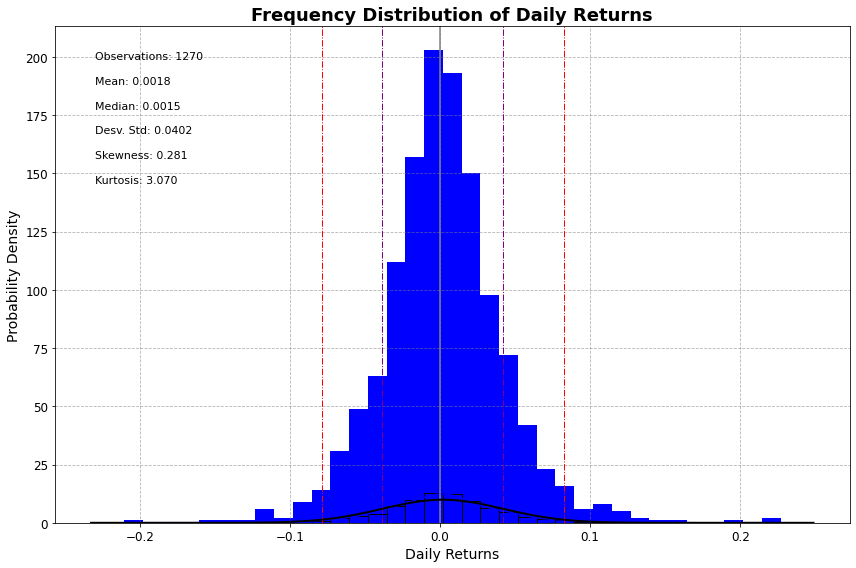

In [52]:
# Create a probability distribution
mean_ret = ret.mean()
median_ret = ret.median()
std_ret = ret.std()


ret.plot(kind="hist", figsize = (12,8), bins = number_bins, color="blue")
sns.histplot(ret, bins=number_bins, color="blue", stat="density", kde=True)

# --- 2. Title and Label Axles ---
plt.title("Frequency Distribution of Daily Returns", fontsize=18, fontweight='bold')
plt.xlabel("Daily Returns", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# --- 3. Cuadrícula Mejorada ---
plt.grid(True, linestyle='--', alpha=0.6, color='gray') # Líneas más sutiles

# --- 4. Marcar la Media, Mediana y Cero ---
mean_ret = ret.mean()
median_ret = ret.median()


plt.axvline(0, color='grey', linestyle='-', linewidth=1.5, label='Zero Return') # Línea en 0
#plt.axvline(mean_ret, color='red', linestyle='--', linewidth=2)
#plt.axvline(median_ret, color='green', linestyle=':', linewidth=2, label=f'Mediana: {median_ret:.4f}')

#--- 5. Add Standar Deviation (indicador de volatilidad) ---
std_ret = ret.std()
left_limit = mean_ret - std_ret
right_limit = mean_ret + std_ret

left_limit_2sigma = mean_ret - std_ret*2
right_limit_2sigma = mean_ret + std_ret*2

plt.axvline(left_limit, color='purple', linestyle='-.', linewidth=1)
plt.axvline(right_limit, color='purple', linestyle='-.', linewidth=1)
plt.axvline(left_limit_2sigma, color='red', linestyle='-.', linewidth=1)
plt.axvline(right_limit_2sigma, color='red', linestyle='-.', linewidth=1)


# --- 6. Superponer una Curva de Distribución Normal (para comparar) ---
# Esto te permite ver qué tan "normal" es la distribución de tus retornos.
xmin, xmax = plt.xlim() # Obtener los límites del eje x
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_ret, std_ret)
plt.plot(x, p, 'k', linewidth=2, label='Curva Normal (Teórica)') # 'k' para negro

# --- 7. Añadir Métricas Descriptivas en el Gráfico (Texto) ---
# Calcular skewness y kurtosis para entender la forma de la distribución
skewness = ret.skew()
kurtosis = ret.kurtosis()

# Posicionar el texto cuidadosamente
plt.text(0.05, 0.95, f'Observations: {len(ret)}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')
plt.text(0.05, 0.90, f'Mean: {mean_ret:.4f}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')
plt.text(0.05, 0.85, f'Median: {median_ret:.4f}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')
plt.text(0.05, 0.80, f'Desv. Std: {std_ret:.4f}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')
plt.text(0.05, 0.75, f'Skewness: {skewness:.3f}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')
plt.text(0.05, 0.70, f'Kurtosis: {kurtosis:.3f}', transform=plt.gca().transAxes, fontsize=11, verticalalignment='top')

# Ajustar el diseño para que todo quepa bien
plt.tight_layout()

# Guarda la figura
plt.savefig(
    'Img/Tesla_Probability Distribution with Density Curve_Plot.png',
    dpi=300,        # Resolución en puntos por pulgada (dots per inch). Mayor DPI = mayor calidad.
    bbox_inches='tight', # Elimina el espacio en blanco extra alrededor del gráfico
    facecolor='white',   # Fondo blanco para el gráfico guardado (útil si tu tema es oscuro)
    transparent=False    # Si es True, el fondo será transparente (para PNG).
)

# Visualizar en Notebook

plt.show()

In [43]:
len(ret)

1270

In [44]:
sum(ret<-0.1)

12

In [46]:
result = ret[(ret > 0.2)& (ret < 0.3)]
len(result)

2

In [48]:
print(result)

Date
2024-10-24    0.21919
2025-04-09    0.22690
Name: Close, dtype: float64
